# Import Data

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv('heart.csv')

age: age in years, numerical

sex(1 = male; 0 = female), norminal

cp: chest pain type, 1=typical angina, 2=atoucak abgubam, 3=nonanginal pain, 4=asymptomatic, norminal

trestbps: resting blood pressure (in mm Hg on admission to the hospital), numerical

cholserum: cholestoral in mg/dl, numberical

fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false), norminal

restecg: resting electrocardiographic results, 0=normal, 1=having ST-T, 2=hypertrophy

thalach: maximum heart rate achieved, numerical

exang: exercise induced angina (1 = yes; 0 = no), norminal

oldpeak: ST depression induced by exercise relative to rest,numercial

slope: the slope of the peak exercise ST segment, 1=upsloping, 2=flat,3=downsloping, norminal

ca: number of major vessels (0-3) colored by flourosopy

thal:3 = normal; 6 = fixed defect; 7 = reversable defect

target1 or 0, 0=<50% diameter narrowing, 1=>=50% diameter narrowing 

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Data Preprocessing

In [5]:
# No missing data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Update data types
df['sex']=df['sex'].astype('str')
df['cp']=df['cp'].astype('str')
df['fbs']=df['fbs'].astype('str')
df['restecg']=df['restecg'].astype('str')
df['exang']=df['exang'].astype('str')
df['slope']=df['slope'].astype('str')
df['ca']=df['ca'].astype('str')
df['thal']=df['thal'].astype('str')
df['target']=df['target'].astype('str')

In [7]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [8]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# Descriptive analysis

In [9]:
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [10]:
df.describe(include='O')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


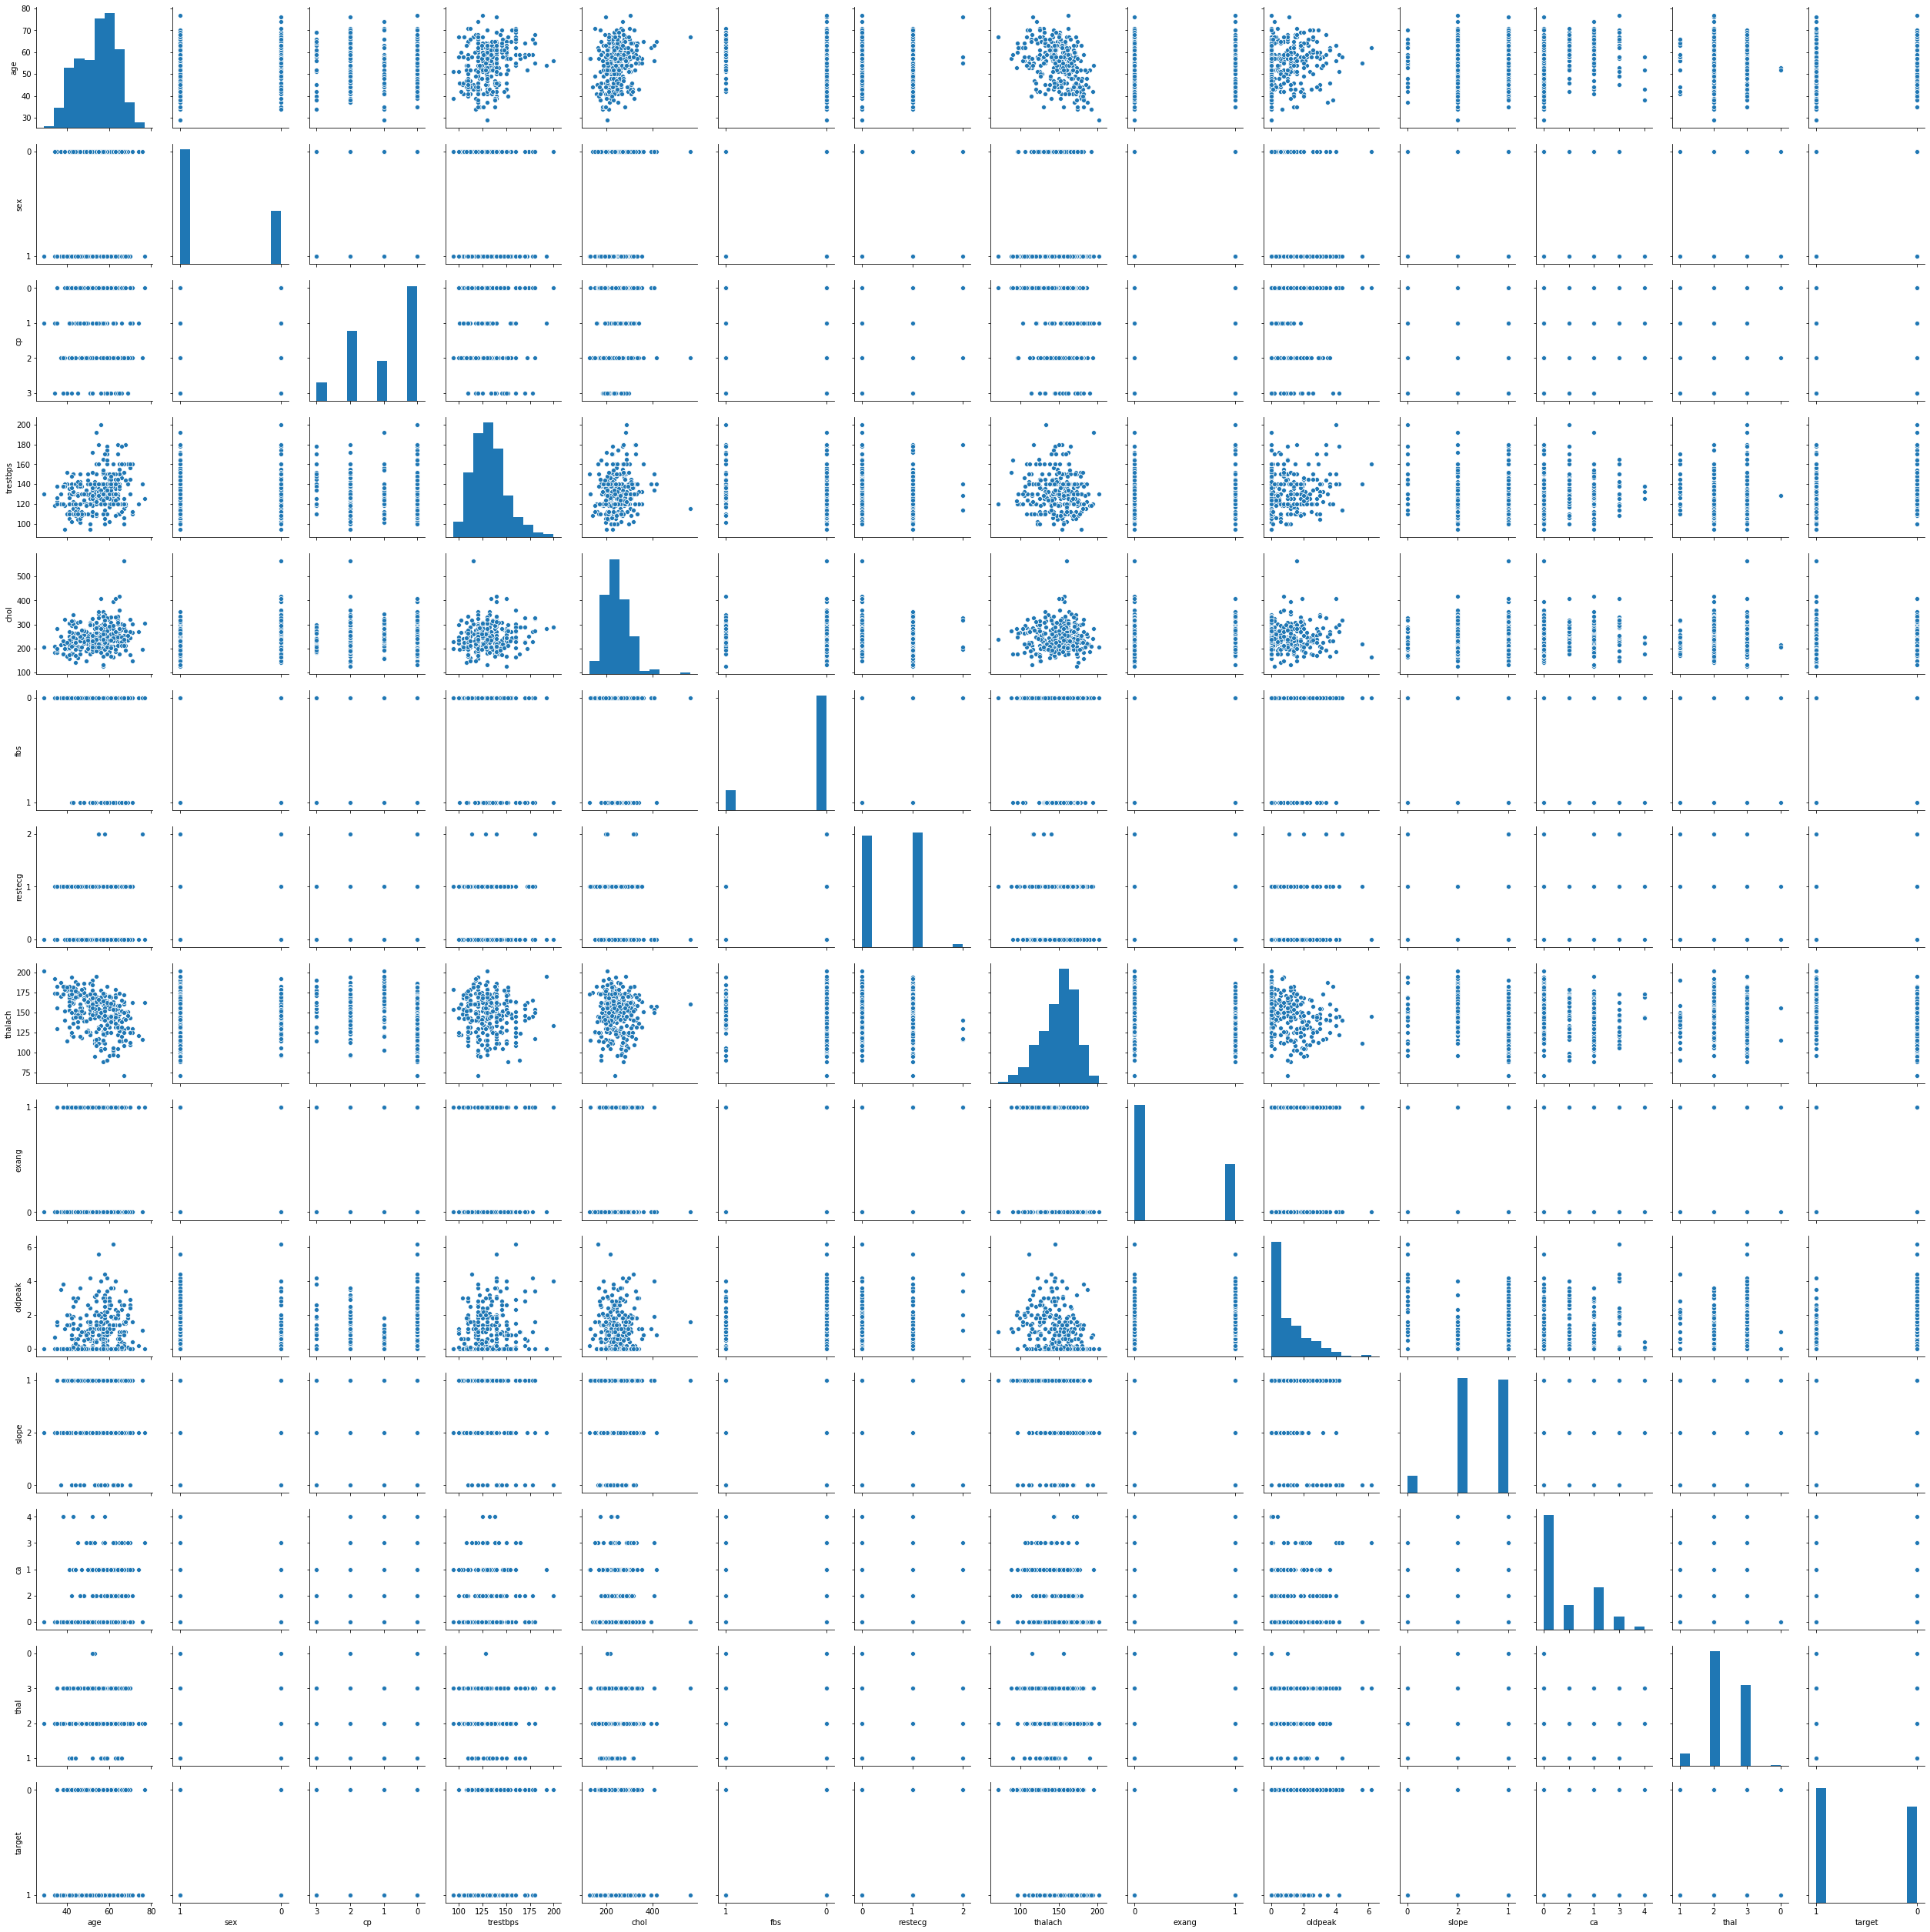

In [52]:
import seaborn as sns
 
sns.pairplot(df)
plt.show()

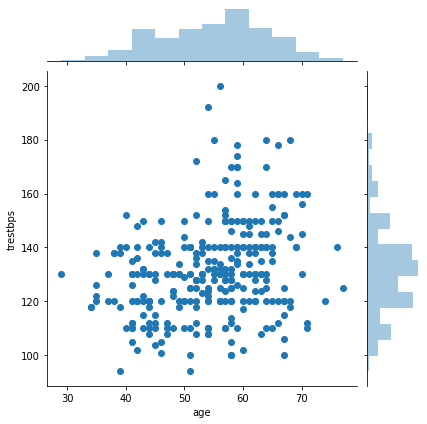

In [12]:
# Take closer look at age&trestbps, age&thalach, chol, oldpeak
sns.jointplot('age', 'trestbps', data=df,kind='scatter')

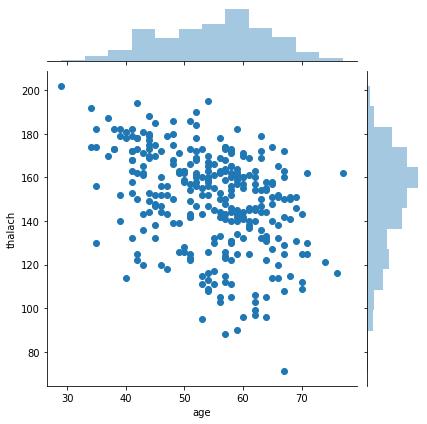

In [57]:
sns.jointplot('age', 'thalach', data=df,kind='scatter')

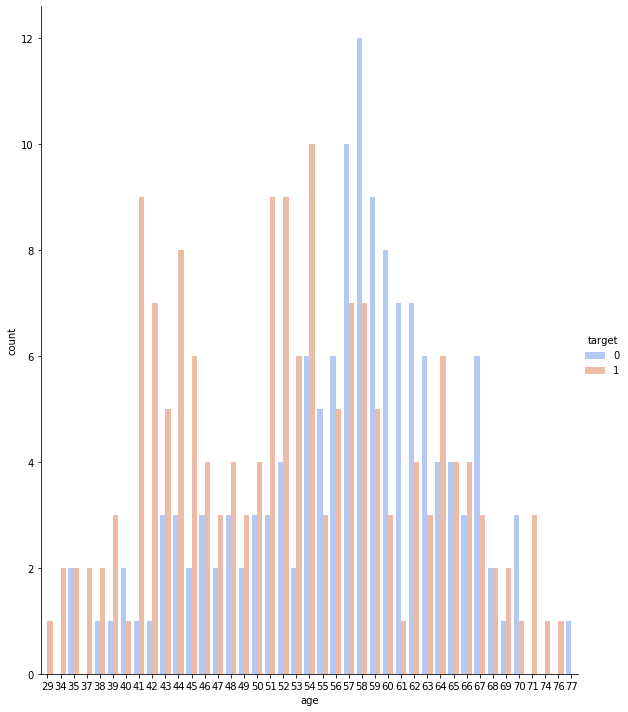

In [69]:
sns.factorplot('age', kind='count', hue='target', data=df, palette='coolwarm', height=10,aspect=.8)

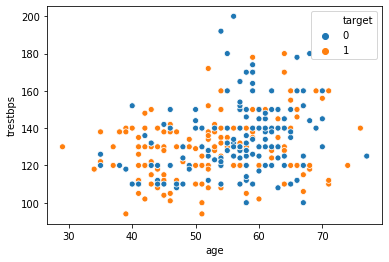

In [59]:
sns.scatterplot('age','trestbps',data=df,hue='target')

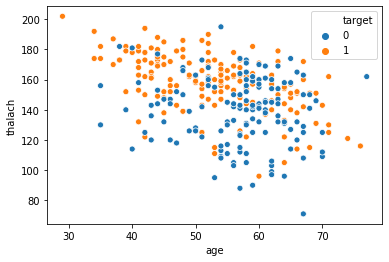

In [58]:
sns.scatterplot('age', 'thalach', data=df, hue='target')

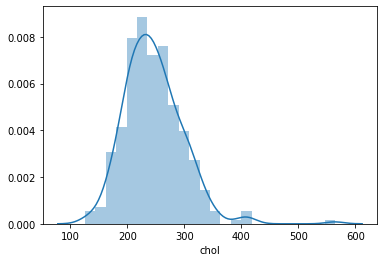

In [15]:
sns.distplot(df['chol'])

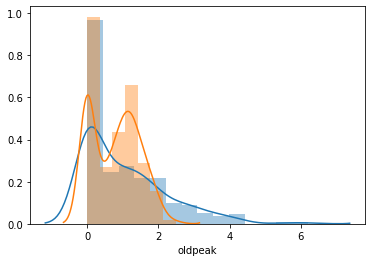

In [16]:
sns.distplot(df['oldpeak'])
# try transform the data 
# When we have zeros in the value, we can perform log transformation while adding a constant to the original values
# or use mean to replace zeros 
# or take square root instead 
# It's better not to transform the data because the current recsult shows a curve closer to normal curve than the others 
sns.distplot(np.sqrt(df['oldpeak']))

# Build Pipeline 

In [10]:
X = df.drop(['target'],axis=1)
y = df['target']

In [29]:
# Pipeline and column transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

#Data transformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Data splitter and model evaluator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

# Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



In [43]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, stratify=y, random_state=1)

cat_column = ['sex','cp','fbs','restecg','exang','slope','ca','thal'] # note to not include the y variable 
num_column = ['age','trestbps','chol','thalach','oldpeak']

pipe = make_pipeline (ColumnTransformer([('cat',OneHotEncoder(handle_unknown='ignore'),cat_column),
                                         ('num',StandardScaler(),num_column)]), 
                      #LogisticRegression(C=0.01,max_iter=100)
                      #SVC(kernel='rbf',C=10,gamma=0.01,probability=True)
                      DecisionTreeClassifier(criterion = 'gini',max_depth=4)
                      #RandomForestClassifier(criterion='gini',n_estimators=200,random_state=1, max_depth=3, n_jobs=2)
                      #KNeighborsClassifier(n_neighbors=5,p=2)
                    )


pipe.fit(X_train, y_train)
print('Trainning Score: ',pipe.score(X_train,y_train))
print('Test Score: ', pipe.score(X_test,y_test))

# Check balance
print('\ny_train hist: \n', y_train.value_counts())
print('\ny_train dist: \n', y_train.value_counts() / len(y_train))


Trainning Score:  0.9009433962264151
Test Score:  0.7802197802197802

y_train hist: 
 1    115
0     97
Name: target, dtype: int64

y_train dist: 
 1    0.542453
0    0.457547
Name: target, dtype: float64


In [19]:
pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('cat',
                                    OneHotEncoder(categorical_features=None,
                                                  categories=None, drop=None,
                                                  dtype=<class 'numpy.float64'>,
                                                  handle_unknown='ignore',
                                                  n_values=None, sparse=True),
                                    ['sex', 'cp', 'fbs', 'restecg', 'exang',
                                     'slope', 'ca', 'thal'])],
                     verbose=False)),
  ('logisticregression',
   LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=100,
                      multi_class='warn'

# Tuning Hyperparameter and Model Selection

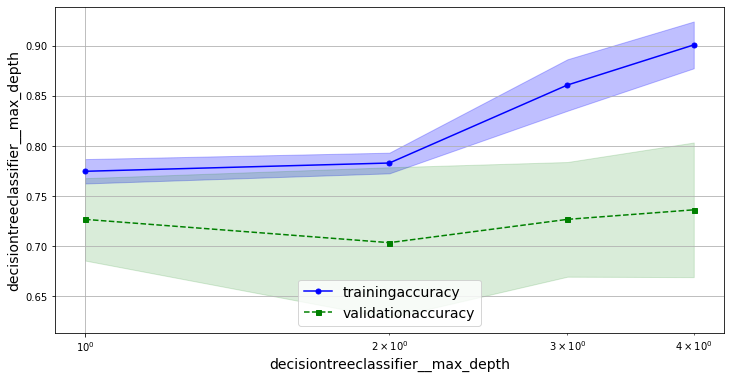

In [44]:
#param_name='logisticregression__C'
#param_range=np.logspace(-3,1,5) #[1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]

#param_name='svc__C'
#param_range = np.arange(5,20,3)
#param_name='svc__gamma'
#param_range=np.logspace(-3,1,5)

param_name='decisiontreeclassifier__max_depth'
param_range=np.arange(1,5,1)

#param_name='randomforestclassifier__max_depth'
#param_range=np.arange(2,6,1)

#param_name='kneighborsclassifier__n_neighbors'
#param_range=np.arange(10,20,2)


scoring='accuracy'

train_scores, val_scores = validation_curve(estimator=pipe, X=X_train, y=y_train, 
                                            cv=5,    # choose 5, if 10 is too slow
                                            param_name=param_name, 
                                            param_range=param_range,
                                            scoring=scoring
                                           )
trn_mean=np.mean(train_scores,axis=1)
trn_std=np.std(train_scores,axis=1)
val_mean=np.mean(val_scores,axis=1)
val_std=np.std(val_scores,axis=1)

plt.figure(figsize=(12,6))
plt.plot(param_range, trn_mean,'bo-', markersize=5, label='training'+scoring)
plt.fill_between(param_range, trn_mean+trn_std, trn_mean-trn_std, alpha=0.25, color='blue')

plt.plot(param_range, val_mean, 'gs--', markersize=5, label='validation'+scoring)
plt.fill_between(param_range, val_mean+val_std, val_mean-val_std, alpha=0.15, color='green')

plt.grid()

plt.xscale('log') 

plt.legend(loc='lower center', fontsize=14)
plt.xlabel(param_name, fontsize=14)
plt.ylabel(param_name, fontsize=14)
plt.show()

# Turnning Multiple Parameters 

In [45]:
params={#'svc__C':np.arange(5,20,3),
       #'svc__gamma':np.logspace(-3,1,5),
       'decisiontreeclassifier__max_depth':np.arange(1,5,1),
       'decisiontreeclassifier__min_samples_leaf': [5, 10],
       #'randomforestclassifier__max_depth':np.arange(2,6,1),
       #'randomforestclassifier__min_samples_leaf':[5,10]
       }

gs=GridSearchCV(estimator=pipe, cv=10,param_grid=params, scoring=scoring)
gs.fit(X_train, y_train)

print('Best parameters: ', gs.best_params_)

pipe=gs.best_estimator_

print('Best Model:')
print('Train Score: ', pipe.score(X_train,y_train))
print('Test Score: ', pipe.score(X_test,y_test))



Best parameters:  {'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__min_samples_leaf': 5}
Best Model:
Train Score:  0.8584905660377359
Test Score:  0.8241758241758241


/Users/babybo/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Final models

In [46]:
pipe = make_pipeline (ColumnTransformer([('cat',OneHotEncoder(handle_unknown='ignore'),cat_column),
                                        ('num',StandardScaler(),num_column)]), 
                      #LogisticRegression(C=1,max_iter=100)
                      #SVC(kernel='rbf',C=8,gamma=0.01,probability=True)
                      DecisionTreeClassifier(criterion = 'gini',max_depth=3,min_samples_leaf=5)
                      #RandomForestClassifier(criterion='gini',n_estimators=200,random_state=1, max_depth=2, min_samples_leaf=5,n_jobs=2)
                      #KNeighborsClassifier(n_neighbors=13,p=2)
                    )


pipe.fit(X_train, y_train)
print('Trainning Score: ',pipe.score(X_train,y_train))
print('Test Score: ', pipe.score(X_test,y_test))

# Check balance
print('\ny_train hist: \n', y_train.value_counts())
print('\ny_train dist: \n', y_train.value_counts() / len(y_train))

Trainning Score:  0.8584905660377359
Test Score:  0.8241758241758241

y_train hist: 
 1    115
0     97
Name: target, dtype: int64

y_train dist: 
 1    0.542453
0    0.457547
Name: target, dtype: float64


# Model Interpretation

In [47]:
feature_names=['age','female','male','typical angina','atoucak abgubm','nonanginal pain','asypmtomatic','trestbps',
               'chol','fbsLess120','fbsMore120','restecgN','restecgS','restecgH','thalach','exangN','exangY','oldpeak',
               'upsloping','flat','downsloping','zeroVessel','oneVessel','twoVessel','threeVessel','fourVessel',
               'thalN','thalF','thalR','thal']

In [41]:
# Logsitic Model
pipe.named_steps.logisticregression.coef_
print(np.vstack( (feature_names, pipe.named_steps.logisticregression.coef_) ).T)

[['age' '0.6870151630541277']
 ['female' '-0.6700582307567662']
 ['male' '-1.0619120211642596']
 ['typical angina' '-0.03744178885961581']
 ['atoucak abgubm' '0.3967373475590937']
 ['nonanginal pain' '0.7195733947621491']
 ['asypmtomatic' '-0.28970767468746206']
 ['trestbps' '0.3066646069848257']
 ['chol' '-0.17214740840692302']
 ['fbsLess120' '0.0857001580757739']
 ['fbsMore120' '0.10340418262851386']
 ['restecgN' '0.29173067508088246']
 ['restecgS' '-0.27477374278351213']
 ['restecgH' '-0.31586289895677294']
 ['thalach' '-0.2384103486774332']
 ['exangN' '0.5712301799315689']
 ['exangY' '1.115228784154084']
 ['oldpeak' '-0.4444701437873143']
 ['upsloping' '-0.8677716446542814']
 ['flat' '-0.5299514178908996']
 ['downsloping' '0.7439213544757762']
 ['zeroVessel' '-0.23727011589195626']
 ['oneVessel' '-0.1256907107612064']
 ['twoVessel' '0.7514576860745041']
 ['threeVessel' '-0.37153992712397876']
 ['fourVessel' '0.0034186349092542503']
 ['thalN' '-0.3182972678007541']
 ['thalF' '-0.083

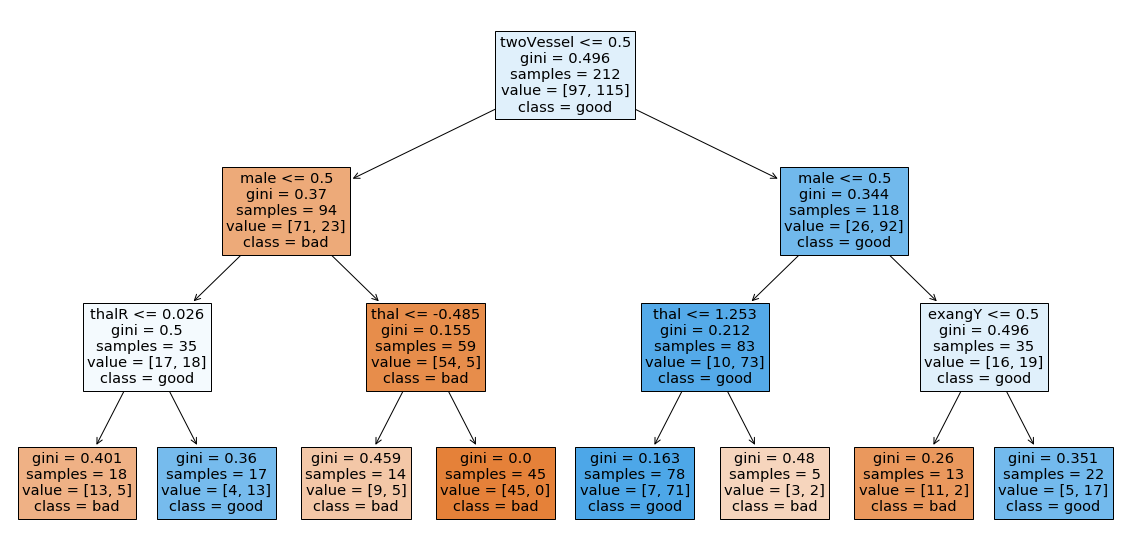

In [49]:
# Decision Tree model
plt.figure(figsize=(20,10))
plot_tree( pipe.named_steps.decisiontreeclassifier, filled=True,
          feature_names = feature_names,
          class_names = ['bad', 'good'],
          #label='root',
         )
plt.show()

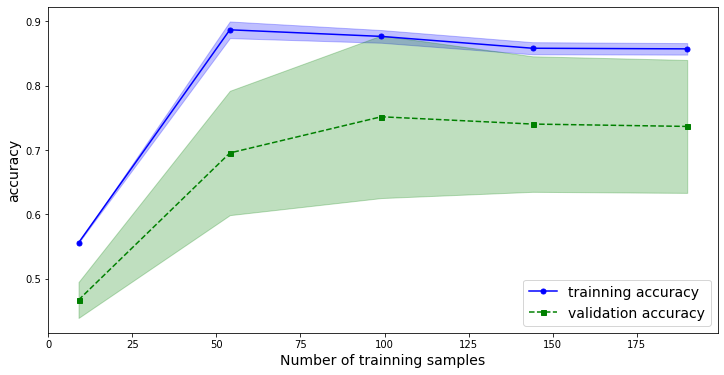

In [50]:
# Learning Curve 
train_sizes, train_scores, test_scores=learning_curve(estimator=pipe, X=X_train, y=y_train, 
                                                     train_sizes=np.linspace(0.05,1,5),
                                                     cv=10,
                                                     scoring=scoring)

train_mean=np.mean(train_scores, axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores, axis=1)
test_std=np.std(test_scores,axis=1)

plt.figure(figsize=(12,6))
plt.plot(train_sizes, train_mean,'bo-',markersize=5,label='trainning '+scoring)
plt.fill_between(train_sizes, train_mean+train_std,train_mean-train_std,alpha=0.25, color='blue')
plt.plot(train_sizes, test_mean, 'gs--',markersize=5, label='validation '+scoring)
plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std,alpha=0.25, color='green')

plt.xlabel('Number of trainning samples',fontsize=14)
plt.ylabel(scoring,fontsize=14)
plt.legend(loc='lower right',fontsize=14)

plt.show()

# The test and validation curve are close to each other, showing a good vaiance - bias trade off for the 
# logistic model and decision tree model. 